In [2]:
import pandas as pd
import pyodbc 
import os

In [7]:
import pandas as pd
import pyodbc
import os

# Database connection details
server = 'KUSHVANTH\MSSQL'
database = 'E-Commerce'
username = 'sa'
password = 'Ku$#v@&t#1202'

# Establish connection
conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"UID={username};"
    f"PWD={password}"
)
cursor = conn.cursor()

# Folder containing CSV files
folder_path = 'C:/Users/2144ax/Downloads/E-commerce'

# List of CSV files and their corresponding table names
csv_files = [
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('payments.csv', 'payments'),
    ('orders.csv', 'orders'),
    ('order_items.csv', 'order_items'),
    ('geolocation.csv', 'geolocation'),
    ('customers.csv', 'customers')  ] # Added payments.csv for specific handling

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BIT'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'NVARCHAR(MAX)'

# Process each CSV file
for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Display NaN counts
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")
    
    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]
    
    # Generate CREATE TABLE statement
    columns = ', '.join([f'[{col}] {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'IF NOT EXISTS (SELECT * FROM sysobjects WHERE name = \'{table_name}\' AND xtype = \'U\') CREATE TABLE {table_name} ({columns})'
    cursor.execute(create_table_query)
    
    # Insert data into the table
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO {table_name} ({', '.join(['[' + col + ']' for col in df.columns])}) VALUES ({', '.join(['?' for _ in row])})"
        cursor.execute(sql, values)
    
    # Commit after each file
    conn.commit()

# Close the connection
conn.close()


Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Processing payments.csv
NaN values before replacement:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
ord

In [8]:
import pandas as pd
import pyodbc
import os

# Database connection details
server = 'KUSHVANTH\MSSQL'
database = 'E-Commerce'
username = 'sa'
password = 'Ku$#v@&t#1202'

# Establish connection
conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"UID={username};"
    f"PWD={password}"
)
cursor = conn.cursor()

# Basic Queries


## 1. List all unique cities where customers are located.

In [12]:
query = """ select distinct customer_city from customers """
cursor.execute(query)
data = cursor.fetchall()
data

[('abadia dos dourados', ),
 ('acucena', ),
 ('afonso claudio', ),
 ('abaira', ),
 ('abdon batista', ),
 ('agua comprida', ),
 ('aguas de lindoia', ),
 ('abreu e lima', ),
 ('agrestina', ),
 ('acari', ),
 ('acegua', ),
 ('agudos', ),
 ('alfenas', ),
 ('agudo', ),
 ('alagoa', ),
 ('alfredo chaves', ),
 ('alfredo marcondes', ),
 ('alcinopolis', ),
 ('alegria', ),
 ('alfredo vasconcelos', ),
 ('alem paraiba', ),
 ('alexania', ),
 ('abre campo', ),
 ('acarau', ),
 ('abadiania', ),
 ('adhemar de barros', ),
 ('abelardo luz', ),
 ('acajutiba', ),
 ('acu', ),
 ('adustina', ),
 ('agronomica', ),
 ('aguas lindas de goias', ),
 ('alpestre', ),
 ('altamira', ),
 ('abaetetuba', ),
 ('abaiara', ),
 ('acailandia', ),
 ('adolfo', ),
 ('alhandra', ),
 ('almenara', ),
 ('adamantina', ),
 ('agua branca', ),
 ('acreuna', ),
 ('agua nova', ),
 ('agua fria de goias', ),
 ('agua preta', ),
 ('aguas claras', ),
 ('alpercata', ),
 ('altaneira', ),
 ('aguas frias', ),
 ('aguia branca', ),
 ('agisse', ),
 ('agu

## 2. Count the number of orders placed in 2017.

In [14]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""
cursor.execute(query)
data = cursor.fetchall()
data[0][0]

45101

## 3. Find the total sales per category.

In [33]:
query = """  select product_category , round(sum(oi.price),2) sales from products as pd
  join order_items as oi on pd.product_id = oi.product_id 
  group by product_category """
cursor.execute(query)
data = cursor.fetchall()
data


[('cds music dvds', 730.0),
 ('Casa Construcao', 83088.12),
 ('Fashion Calcados', 23562.77),
 (None, 179535.28),
 ('Art', 24202.64),
 ('climatization', 55024.96),
 ('House Comfort 2', 760.27),
 ('automotive', 592720.11),
 ('babies', 411764.89),
 ('PC Gamer', 1545.95),
 ('Blu Ray DVDs', 5999.39),
 ('Hygiene diapers', 1567.59),
 ("Fashion Women's Clothing", 2803.64),
 ('drinks', 22428.7),
 ('Agro Industria e Comercio', 72530.47),
 ('CITTE AND UPHACK FURNITURE', 4368.08),
 ('bed table bath', 1036988.68),
 ("Fashion Men's Clothing", 10797.82),
 ('toys', 483946.6),
 ("Fashion Children's Clothing", 569.85),
 ('Christmas articles', 8800.82),
 ('song', 6034.35),
 ('Construction Tools Garden', 25715.89),
 ('musical instruments', 191498.88),
 ('Fashion Sport', 2119.51),
 ('House comfort', 58572.04),
 ('HEALTH BEAUTY', 1258681.34),
 ('insurance and services', 283.29),
 ('Cool Stuff', 635290.85),
 ('Drink foods', 15179.48),
 ('electrostile', 190648.58),
 ('fixed telephony', 59583.0),
 ('Furniture 

## 4. Calculate the percentage of orders that were paid in installments.

In [35]:
query = """ select (sum(case when payment_installments >= 1 then 1 else 0 end))*100/count(*) as percentage from payments; """
cursor.execute(query)
data = cursor.fetchall()
data[0][0]

99

## 5. Count the number of customers from each state. 

In [55]:
query = """ select count(customer_unique_id) TotalCust, customer_state from customers 
  group by customer_state """
cursor.execute(query)
data = cursor.fetchall()
data
df = pd.DataFrame({'Total_Cust' : [1652,536,975,5466,81,3380,41746,3637,350,747,280,253,2140,907,5045,1336,413,46,11635,715,2020,485,68,12852,2033,148,495], 'State': ['PE', 'PB', 'PA', 'RS', 'AC', 'BA', 'SP', 'SC', 'SE', 'MA', 'TO', 'RO','DF','MT','PR','CE','AL','RR','MG','MS','GO','RN','AP','RJ','ES','AM','PI']})
df

,Total_Cust,State
0,1652,PE
1,536,PB
2,975,PA
3,5466,RS
4,81,AC
5,3380,BA
6,41746,SP
7,3637,SC
8,350,SE
9,747,MA


# Intermediate Queries

## 1. Calculate the number of orders per month in 2018.

In [61]:
query = """ select month(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by month(order_purchase_timestamp) """
cursor.execute(query)
data = cursor.fetchall()
data


[(1, 7269),
 (2, 6728),
 (3, 7211),
 (4, 6939),
 (5, 6873),
 (6, 6167),
 (7, 6292),
 (8, 6512),
 (9, 16),
 (10, 4)]

In [63]:
df = pd.DataFrame({'months' : [1,2,3,4,5,6,7,8,9,10], 'order_count': [7269, 6728,7211,6939,6873,6167,6292,6512,16,4]})
df

,months,order_count
0,1,7269
1,2,6728
2,3,7211
3,4,6939
4,5,6873
5,6,6167
6,7,6292
7,8,6512
8,9,16
9,10,4


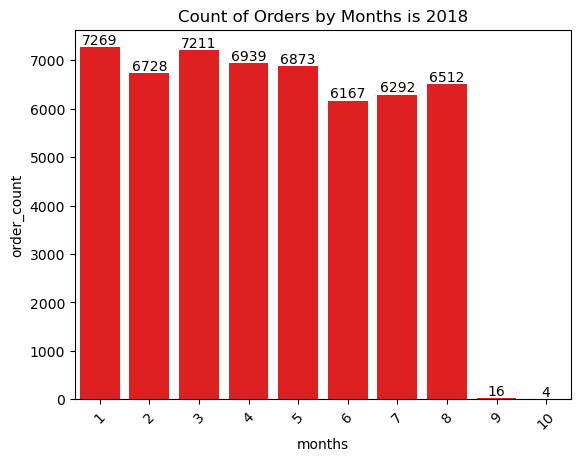

In [68]:
import matplotlib.pyplot as plt 
import seaborn as sns

ax = sns.barplot(x = df["months"],y =  df["order_count"], data = df, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months is 2018")

plt.show()

## 2. Find the average number of products per order, grouped by customer city.

In [78]:
query = """ WITH count_per_order AS (
    SELECT 
        orders.order_id, 
        orders.customer_id, 
        COUNT(order_items.order_id) AS oc
    FROM orders 
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)

SELECT 
    customers.customer_city, 
    ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM customers 
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city 
ORDER BY average_orders DESC; """
cursor.execute(query)
data = cursor.fetchall()
data
df = pd.DataFrame(data)
df

,0
0,"[padre carvalho, 7]"
1,"[datas, 6]"
2,"[candido godoi, 6]"
3,"[celso ramos, 6]"
4,"[matias olimpio, 5]"
...,...
4105,"[canaa dos carajas, 1]"
4106,"[canavieiras, 1]"
4107,"[canoinhas, 1]"
4108,"[canudos, 1]"


## 3. Calculate the percentage of total revenue contributed by each product category.

In [81]:
query = """  with Total_Revenue as (
  SELECT product_id, sum(price + freight_value) AS total_value FROM order_items GROUP BY product_id
  )
  select product_category, (SUM(total_value) / (SELECT SUM(total_value) FROM Total_Revenue)) * 100 AS percentage_revenue from products
  join Total_Revenue on Total_Revenue.product_id = products.product_id 
  group by product_category
  ORDER BY 
    percentage_revenue DESC; """
cursor.execute(query)
data = cursor.fetchall()
data
df = pd.DataFrame(data)
df

,0
0,"[HEALTH BEAUTY, 9.096747731823823]"
1,"[Watches present, 8.24020716958818]"
2,"[bed table bath, 7.837141714303981]"
3,"[sport leisure, 7.300486592109939]"
4,"[computer accessories, 6.685825988362697]"
...,...
69,"[flowers, 0.010091864973592247]"
70,"[House Comfort 2, 0.007388367888616379]"
71,"[cds music dvds, 0.006027625151591311]"
72,"[Fashion Children's Clothing, 0.00419956300156..."


## 4. Identify the correlation between product price and the number of times a product has been purchased.